In [127]:
import math
from functools import partial
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# sigmoid function

In [66]:
def sigmoid(zoom, shift, x):
    return (1 / (1 + (math.e ** (-x * zoom + shift))))
sigmoid(1 ,1, 1)

0.5

# plot parametrized variants of the sigmoid function

In [57]:
def plot(f):
    x = np.linspace(-10, 10, 1000)
    y = np.apply_along_axis(f, 0, x)
    plt.plot(x, y)

## standard sigmoid

In [61]:
standard_sigmoid =  partial(sigmoid, 1, 0)

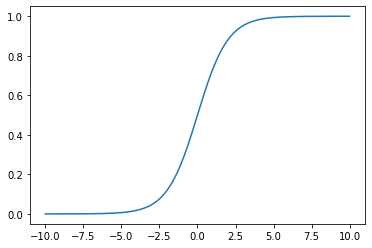

In [62]:
plot(standard_sigmoid)

## shifted sigmoid

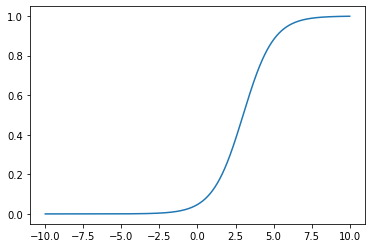

In [67]:
shifted_sigmoid =  partial(sigmoid, 1, 3)
plot(shifted_sigmoid)

# load the iris dataset

In [117]:
df = pd.read_csv("data/iris.csv")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [118]:
df["species"] = pd.Categorical(df["species"])
df.dtypes

sepal_length     float64
sepal_width      float64
petal_length     float64
petal_width      float64
species         category
dtype: object

# Scatter plot see edge categories

In [128]:
sns.set_style("whitegrid")

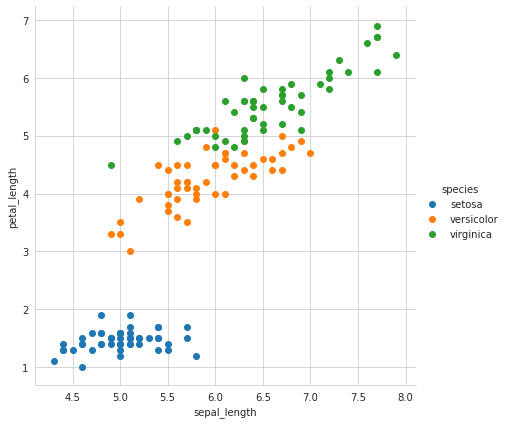

In [131]:
sns.FacetGrid(
    df,
    hue ="species",
    height = 6
).map(
    plt.scatter,
    'sepal_length',
    'petal_length'
).add_legend()

we will create model to find if a individual is a virginica or not

We will use logistic reggression on the petal length variable

# labeling

In [137]:
df["is_virginica"] = (df["species"] == "virginica").astype(np.int8)
df

,sepal_length,sepal_width,petal_length,petal_width,species,is_virginica
0,5.1,3.5,1.4,0.2,setosa,0
1,4.9,3.0,1.4,0.2,setosa,0
2,4.7,3.2,1.3,0.2,setosa,0
3,4.6,3.1,1.5,0.2,setosa,0
4,5.0,3.6,1.4,0.2,setosa,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,1
146,6.3,2.5,5.0,1.9,virginica,1
147,6.5,3.0,5.2,2.0,virginica,1
148,6.2,3.4,5.4,2.3,virginica,1


# training

In [146]:
(df["petal_length"].apply(lambda x: sigmoid(1, 0, x)) > 0.5).astype(np.int8)

0      1
1      1
2      1
3      1
4      1
      ..
145    1
146    1
147    1
148    1
149    1
Name: petal_length, Length: 150, dtype: int8

In [147]:
df["is_virginica"]

0      0
1      0
2      0
3      0
4      0
      ..
145    1
146    1
147    1
148    1
149    1
Name: is_virginica, Length: 150, dtype: int8

In [159]:
a = np.array([0,1,1])
b = np.array([0,0,1])
(a | b)  - (a & b)

array([0, 1, 0])

In [163]:
def invert(arr):
    return -1 * (arr - 1)
invert(a)

array([1, 0, 0])

In [153]:
def logistic_model_1d(shift, threshold, df_original):
    df = df_original.copy()
    labels = df["is_virginica"]
    n_P = np.sum(labels)
    n_N = labels.shape[0] - n_P
    
    predictions = (df["petal_length"].apply(lambda x: sigmoid(1, shift, x)) > threshold).astype(np.int8)
    n_TP = np.sum(predictions & labels)
    
    TN = (invert(predictions) & invert(labels))
    
    
    
    n_FP = np.sum(
        (predictions | labels)
        - (predictions && labels))
    sensitivity = n_TP / n_P
    specificity = 1 - (n_FP / n)
    
    
    
    

In [138]:
min_petal = df["petal_length"].min()
min_petal

1.0

In [140]:
max_petal = df["petal_length"].max()
max_petal

6.9

In [142]:
shift_arr = np.linspace(
    min_petal,
    max_petal,
    10000
)

In [ ]:
for shift in shift_arr():
      logistic_model_1d(shift, 0.5, df)